# Sam Bacon
## Lab 06 - March 1, 2021
### Text Mining

In [ ]:
# Impressions

Data mining seems to be a useful way to identify patterns and trends in datasets that are not obvious. It is a highly exploratory process that often allows us to understand the behavior of data. Machine learning allows us to use technology to filter and sort data. Machine learning techniques allow us to train models and then use implement those models to filter through and classify large quantities of data. Machine learning is fascinating, and it is something that I have hardly any experience in.


In [ ]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns;
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from scipy.spatial import distance


In [ ]:
# Read in dataset and display first rows
survey = pd.read_csv('dmml_survey.csv')
survey.head(5)

,Impressions,Courses,Motivation_grade,Motivation_future_career,Motivation_intellectual_challenge,Motivation_code_cool_stuff,Motivation_social_interaction,Motivation_ahead_of_time,Confidence_java,Confidence_python,Confidence_nested_loops,Confidence_pseudocode,Confidence_summations,Confidence_partial_derivatives,Confidence_vector_dot_product,Confidence_linear_regression,Confidence_conditional_probability
0,"buzzwordy, but needed. I'm excited to learn de...","CSC 111 Data Science and Visualization, CSC 23...",6.0,7.0,7.0,7.0,4.0,4.0,7.0,5.0,7.0,6.0,1.0,1.0,1.0,3.0,5.0
1,I don’t know much about them,"CSC 230 Computer Science II, CSC 301 Database ...",6.0,4.0,4.0,6.0,2.0,4.0,5.0,5.0,6.0,6.0,3.0,3.0,2.0,2.0,6.0
2,These two concepts seem intimately intertwined...,"CSC 111 Data Science and Visualization, CSC 23...",6.0,7.0,5.0,6.0,6.0,6.0,5.0,7.0,7.0,7.0,4.0,6.0,2.0,7.0,4.0
3,"To me, data mining is being able to harvest da...","CSC 230 Computer Science II, CSC 242 Organizat...",7.0,7.0,6.0,6.0,3.0,7.0,7.0,2.0,7.0,6.0,7.0,3.0,1.0,2.0,4.0
4,I believe data mining is looking through code ...,"CSC 230 Computer Science II, CSC 242 Organizat...",7.0,6.0,5.0,7.0,4.0,5.0,4.0,3.0,4.0,3.0,4.0,4.0,1.0,2.0,2.0


In [ ]:
# Display last few rows
survey.tail(5)

,Impressions,Courses,Motivation_grade,Motivation_future_career,Motivation_intellectual_challenge,Motivation_code_cool_stuff,Motivation_social_interaction,Motivation_ahead_of_time,Confidence_java,Confidence_python,Confidence_nested_loops,Confidence_pseudocode,Confidence_summations,Confidence_partial_derivatives,Confidence_vector_dot_product,Confidence_linear_regression,Confidence_conditional_probability
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Drop rows with missing values
survey = survey.dropna()

In [ ]:
# Missing values are removed
survey.tail(5)

,Impressions,Courses,Motivation_grade,Motivation_future_career,Motivation_intellectual_challenge,Motivation_code_cool_stuff,Motivation_social_interaction,Motivation_ahead_of_time,Confidence_java,Confidence_python,Confidence_nested_loops,Confidence_pseudocode,Confidence_summations,Confidence_partial_derivatives,Confidence_vector_dot_product,Confidence_linear_regression,Confidence_conditional_probability
19,"Having taken ""data mining"" in the business sch...","CSC 111 Data Science and Visualization, CSC 23...",7.0,7.0,7.0,7.0,7.0,7.0,5.0,2.0,6.0,2.0,7.0,2.0,7.0,5.0,2.0
20,I've had a bit of exposure to machine learning...,"CSC 111 Data Science and Visualization, CSC 23...",7.0,5.0,5.0,5.0,4.0,6.0,5.0,5.0,5.0,2.0,7.0,7.0,7.0,7.0,7.0
21,"Cleaning, transforming, mining data with the a...","CSC 230 Computer Science II, CSC 301 Database ...",7.0,7.0,6.0,6.0,7.0,6.0,6.0,5.0,7.0,5.0,6.0,4.0,7.0,7.0,6.0
22,Sounds cool,"CSC 230 Computer Science II, CSC 242 Organizat...",7.0,7.0,7.0,7.0,5.0,5.0,6.0,6.0,7.0,7.0,7.0,6.0,6.0,5.0,6.0
23,"I think data mining is very powerful, and can ...","CSC 111 Data Science and Visualization, CSC 23...",6.0,7.0,6.0,7.0,6.0,6.0,7.0,5.0,7.0,6.0,7.0,7.0,6.0,6.0,5.0


In [ ]:
# Creating 'impressions' variable
impressions = survey['Impressions']
impressions.head(5)

0    buzzwordy, but needed. I'm excited to learn de...
1                         I don’t know much about them
2    These two concepts seem intimately intertwined...
3    To me, data mining is being able to harvest da...
4    I believe data mining is looking through code ...
Name: Impressions, dtype: object

In [ ]:
# List of stop words
stop_words = ['a', 'an', 'the','i','think','of','to','in','it','is','and','am','are','be']

In [ ]:
# Extract counts and features
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(lowercase=True, stop_words=stop_words)
sparse_counts = count_vect.fit_transform(impressions)

terms = count_vect.get_feature_names()
counts = sparse_counts.todense()

In [ ]:
# Print first ten terms
print("First ten terms")
print()
for x in range(0,10) :
  print(terms[x])

# Print counts for first 5 examples
print()
print("First five counts")
print()
for x in range(0,5):
  print(counts[x])


First ten terms

ability
able
about
accuracy
aid
algorithm
amazon
analysis
analytics
analyze

First five counts

[[0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 1 0 0 2 2 0 0 0 1 0 0 0 2 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0
  0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
  0 1 0 1 1 0 0 0 0 0]]
[[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0

In [ ]:
# Matrix of TF-IDF Scores
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
sparse_tfidf = tfidf_transformer.fit_transform(counts)
tfidf = sparse_tfidf.todense()
tfidf

matrix([[0.        , 0.        , 0.14218174, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.35205268, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.13372037, 0.        ,
         0.        ],
        ...,
        [0.35958469, 0.        , 0.        , ..., 0.53226667, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

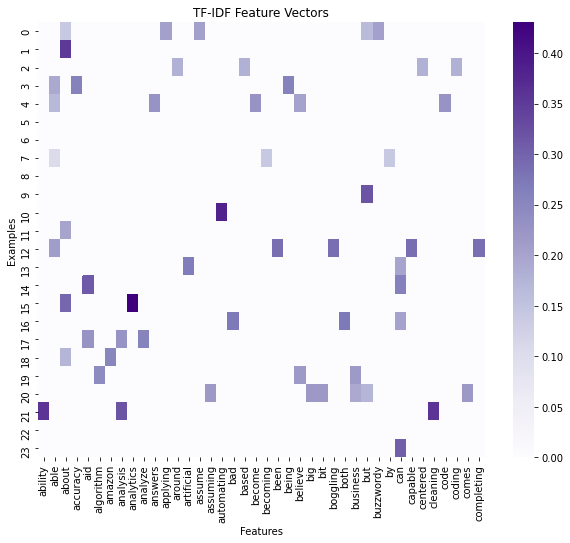

In [ ]:
# Display feature vectors as a heatmap (40 terms)
plt.figure(figsize=(10, 8))
sns.heatmap(tfidf[:,0:40], square=False, annot=False, cbar=True, cmap="Purples",
            xticklabels=count_vect.get_feature_names()[0:40])

plt.xticks(rotation=90) 
plt.xlabel('Features')
plt.ylabel('Examples')
plt.title('TF-IDF Feature Vectors')
plt.show()

In [ ]:
# My response

my_example = ["Data mining seems to be a useful way to identify patterns and trends in datasets that are not obvious. It is a highly exploratory process that often allows us to understand the behavior of data. Machine learning allows us to use technology to filter and sort data. Machine learning techniques allow us to train models and then use implement those models to filter through and classify large quantities of data. Machine learning is fascinating, and it is something that I have hardly any experience in."]
my_example


['Data mining seems to be a useful way to identify patterns and trends in datasets that are not obvious. It is a highly exploratory process that often allows us to understand the behavior of data. Machine learning allows us to use technology to filter and sort data. Machine learning techniques allow us to train models and then use implement those models to filter through and classify large quantities of data. Machine learning is fascinating, and it is something that I have hardly any experience in.']

In [ ]:
# my feature counts and TF-IDF scores

new_counts = count_vect.transform(my_example)
print('New feature counts:\n', new_counts.todense())
new_tfidf = tfidf_transformer.transform(new_counts)
new_tfidf = new_tfidf.todense()
print('\nNew TF-IDF scores:')
new_tfidf

New feature counts:
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 1 0 3 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 1 0 0 0 0
  0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
  0 0 1 0 1 0 0 0 0 0 0 3 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 2 0 0 0 0 0 0 1
  0 0 0 0 0 0 0 0 0 0]]

New TF-IDF scores:


matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.2908641 ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.16969329, 0.        , 0.        , 0.16969329,
         0.        , 0.        , 0

In [ ]:
# Find the highest valued feature
idx = np.argmax(new_tfidf)
feat = count_vect.get_feature_names()[idx]
print('Highest valued feature: {}, TF-IDF score: {:.2f}'.format(feat, new_tfidf[0, idx]))

Highest valued feature: that, TF-IDF score: 0.38


In [ ]:
# Build model to return nearest neighbors

from sklearn.neighbors import NearestNeighbors

# Create the KNN model
# Since we want to compare sparse feature vectors, we use cosine distance.
knn = NearestNeighbors(n_neighbors=5, algorithm='brute', metric=distance.cosine)

# Fit the model to the TF-IDF feature vectors
model = knn.fit(tfidf)
model

NearestNeighbors(algorithm='brute', leaf_size=30,
                 metric=<function cosine at 0x7f3b805570e0>, metric_params=None,
                 n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [ ]:
# Find five most similar impressions and calculate cosine distances
distance, neighbor_idx = model.kneighbors(new_tfidf)

print('Distances to neighbors:\n', distance)

print('\nNeighbor index:')
neighbor_idx

Distances to neighbors:
 [[0.71500274 0.7669696  0.77016307 0.78043987 0.79126971]]

Neighbor index:


array([[ 0, 18, 16,  4,  7]])

In [ ]:
# Print text from five most similar impressions from the data
print("Similar impressions from the data")
print()
for i in neighbor_idx[0]:
  print(i, impressions.iloc[i])
  print()

Similar impressions from the data

0 buzzwordy, but needed. I'm excited to learn deeper methods of data mining and machine learning. Usually when I see machine learning, I assume that people are just applying models, so I'm curious about what we'll learn.

18 I know nothing about machine learning. I think data mining has something to do with gathering data? I worked with scraping data off Twitter and Amazon.

16 Like everything, data mining and machine learning can be used for both bad and good. I'm hoping to learn of the good ways to use it :)

4 I believe data mining is looking through code and data to try to find answers to potential questions. Machine learning is programing a machine to be able to learn and improve on its own to become more efficient.

7 I find it fascinating how data mining is becoming increasingly prevalent in fields ranging from sales to financial research and how data scientist are able to some degree predict future trends in these fields. I am looking forward 